# **Telecom users analysis. Predicting customer churn**

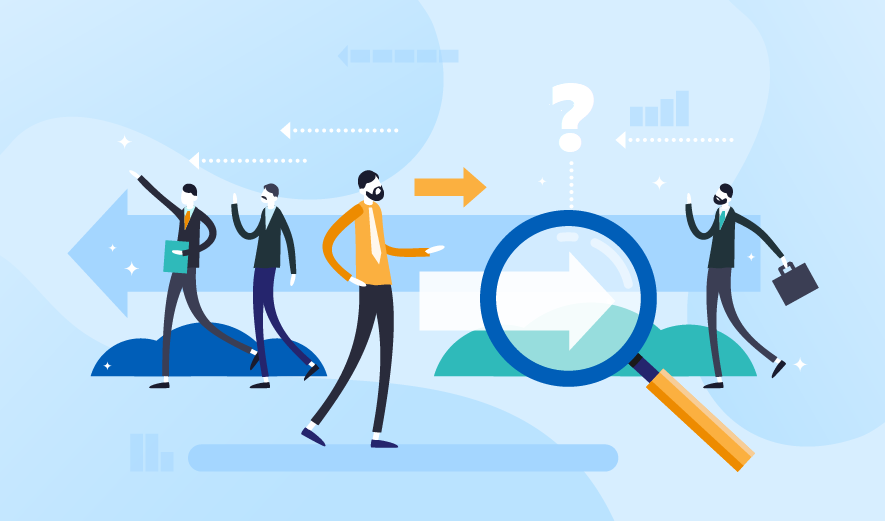

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to keep the use of new ones. Retaining a customer will cost the company less than attracting a new one. In addition, a new client may be interested in services.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data on the services, we can make him a special offer, trying to change his decision to leave the operator. This goal of retention will be easier to implement than the task of acquiring new users that we don't know about yet.

Provided a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

The task is to analyze the data and predict the churn of users (identify people who will and will not renew their contracts).

The work includes the following parts:

1. Description of data
2. Research of dependencies and formulation of hypotheses
3. Building models for predicting churn based on proven hypotheses and identified relationships
4. Comparison of the quality of the obtained models.

Dataset contains the following values:

* customerID - customer id<br>
* gender - client gender (male / female)<br>
* SeniorCitizen - is the client retired (1, 0)<br>
* Partner - is the client married (Yes, No)<br>
* tenure - how many months a person has been a client of the company<br>
* PhoneService - is the telephone service connected (Yes, No)<br>
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)<br>
* InternetService - client's Internet service provider (DSL, Fiber optic, No)<br>
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)<br>
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)<br>
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)<br>
* TechSupport - is the technical support service connected (Yes, No, No internet service)<br>
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)<br>
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)<br>
* Contract - type of customer contract (Month-to-month, One year, Two year)<br>
* PaperlessBilling - whether the client uses paperless billing (Yes, No)<br>
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
* MonthlyCharges - current monthly payment<br>
* TotalCharges - the total amount that the client paid for the services for the entire time<br>
* Churn - whether there was a churn (Yes or No)<br>

# 1. Description of data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

users = pd.read_csv('/kaggle/input/telecomcsv/telecom_users.csv')
users = users.drop(columns=['Unnamed: 0', 'customerID'])

users

So we have medium-sized dataset with a 5986 rows and 20 columns.

In [ ]:
print(f'There are {users.duplicated().sum()} duplicates in dataset.')

In [ ]:
print(f'There are {users.isnull().any().sum()} columns in dataset with missing values.')

# Visualisation

In [ ]:
users['SeniorCitizen'] = users['SeniorCitizen'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [ ]:
demos = ['SeniorCitizen', 'Partner', 'gender', 'Dependents']

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12, 8), sharey=True)
axes = axes.ravel()


for ax, x in zip(axes.ravel(), demos):
    ax.bar(users[x].unique(),users[x].value_counts(), 
               color=['grey', 'tan'])
    ax.set_title(x, fontsize=14)
    

fig.suptitle('Demography analysis', fontsize=18)
plt.show()

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15, 11))

axes = axes.ravel()

for ax, x in zip(axes.ravel(), services):
    ax.pie(users[x].value_counts(), labels=users[x].unique(),autopct='%1.1f%%',
          colors=['grey', 'tan','lightsteelblue'])
    ax.set_title(x, fontsize=14)

fig.suptitle('Distribution of the count of users from use the services', fontsize=18)
plt.show()

In [ ]:
payment = ['PaymentMethod', 'PaperlessBilling', 'Contract']

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15, 6))

axes = axes.ravel()

for ax, x in zip(axes.ravel(), payment):
    ax.pie(users[x].value_counts(), labels=users[x].unique(),autopct='%1.1f%%',
          colors=['grey', 'tan','lightsteelblue', 'cornflowerblue'])
    ax.set_title(x, fontsize=14)\

fig.suptitle('Users preferences in terms of payment', fontsize=18)
plt.show()

In [ ]:
print('Descriptive statistics of monthly charges:\n',users['MonthlyCharges'].describe())

In [ ]:
users['TotalCharges'] = users['TotalCharges'].replace(' ', 0)
users['TotalCharges'] = users['TotalCharges'].astype(float)
# column 'TotalCharges' have value with space inside

In [ ]:
print('Descriptive statistics of total charges:\n',users['TotalCharges'].describe())

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)


feat_plot = sns.histplot(users['MonthlyCharges'], bins=10, ax=axes[0], color='grey')
feat_plot.set(xticks=[10, 30, 50, 70 , 90, 110, 130])

feat_plot2 = sns.histplot(users['TotalCharges'], bins=20, ax=axes[1], color='tan')
feat_plot2.set(xticks=np.arange(0, 9000, 1000))

fig.suptitle('Distribution of the count of users from charges\n', fontsize=18)
fig = feat_plot.get_figure()

And finally:

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(6, 6))
ax = plt.bar(users['Churn'].unique(), users['Churn'].value_counts(), color=['grey', 'tan'])
plt.title('Count of users who left in the churn\n', fontsize=18)


plt.show()



# 2. Research of dependencies and formulation of hypotheses

Let's check the dependence of the churn on demographic data:

In [ ]:
%matplotlib inline

for i in demos:
    churn_users = users.groupby([i,'Churn']).size().unstack()
    ax = (churn_users.T*100.0 / churn_users.T.sum()).T.plot(kind='bar',
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (5,5),
                                                                    color=['grey', 'tan'])

Users with dependents, without partners and senior citizens are churned out more often.


Next check the dependence of the churn on services data:

In [ ]:
for i in services:
    churn_users = users.groupby([i,'Churn']).size().unstack()
    ax = (churn_users.T*100.0 / churn_users.T.sum()).T.plot(kind='bar',
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (5,5),
                                                                    color=['grey', 'tan'])

Users with fiber-optic, with internet and without services are are churned out more often.

And check the dependence of the churn on payment terms:

In [ ]:
for i in payment:
    churn_users = users.groupby([i,'Churn']).size().unstack()
    ax = (churn_users.T*100.0 / churn_users.T.sum()).T.plot(kind='bar',
                                                                    stacked = True,
                                                                    rot = 0, 
                                                                    figsize = (5,5),
                                                                    color=['grey', 'tan'])
    plt.xticks(rotation=25)

Users with month2moth contract, paperpless billing and electronic check payment method are churned out more often.

Let's see how churn dependence on charges:

In [ ]:
churn_my = users[users['Churn'] == 'Yes']
churn_mn = users[users['Churn'] == 'No']

sns.histplot(churn_my['MonthlyCharges'], color='red')
sns.histplot(churn_mn['MonthlyCharges'], color='tan')

plt.show()

Most of those who went into the churn had a high level of monthly charges.

In [ ]:
churn_my = users[users['Churn'] == 'Yes']
churn_mn = users[users['Churn'] == 'No']

sns.histplot(churn_my['TotalCharges'], color='red')
sns.histplot(churn_mn['TotalCharges'], color='tan')

plt.show()

Those who have gone into the churn have a lower level of total charges.

And on tenure:

In [ ]:
churn_my = users[users['Churn'] == 'Yes']
churn_mn = users[users['Churn'] == 'No']

sns.histplot(churn_my['tenure'], color='red')
sns.histplot(churn_mn['tenure'], color='tan')

plt.show()

There are no surprices. Most of those who left for the churn did not use the services for long.

**The following hypotheses can be made from the investigated dependencies**:

1. Users are not satisfied with the quality of the optic fiber Internet.
2. Users who have used online services (except for streaming services) have lower loyalty.
3. Customers who paying with electronic check churned out easier.
4. The higher the monthly charges, the greater the likelihood of a churn. It is possible that users are unhappy with the prices of services.
5. The longer the client uses the services of the company, the more loyalty he has.
6. Monthly contracts make it easier to go into the churn.
7. The company has a low entry threshold for users.

Now let's do some feature engineering.

Transform categorical data:

In [ ]:
users['PaperlessBilling'] = users['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
users['gender'] = users['gender'].apply(lambda x: 1 if x == 'Male' else 0)
users['Churn'] = users['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
users['Partner'] = users['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
users['Dependents'] = users['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
users['PhoneService'] = users['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
users['MultipleLines'] = users['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)
users['SeniorCitizen'] = users['SeniorCitizen'].apply(lambda x: 1 if x == 'Yes' else 0)

Convert categorical variable into indicator variables:

In [ ]:
cat_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Contract', 'PaymentMethod']

In [ ]:
num_features = pd.get_dummies(users[cat_features])
num_features 

Standartize numerical data:

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaled = std.fit_transform(users['tenure'].values.reshape(-1, 1))
users['tenure'] = scaled

scaled2 = std.fit_transform(users['MonthlyCharges'].values.reshape(-1, 1))
users['MonthlyCharges'] = scaled2

scaled3 = std.fit_transform(users['TotalCharges'].values.reshape(-1, 1))
users['TotalCharges'] = scaled3

In [ ]:
original_features = users[['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn', 'PaperlessBilling', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']]
original_features

And now we have dataset with 38 features:

In [ ]:
users2 = pd.concat([num_features, original_features], axis=1, join='inner')
users2

# 3. Building models for predicting churn based on proven hypotheses and identified relationships

We have a binary classification problem, so to solve it, I took a couple of standard methods (SVM and LinearRegression) and a couple of ensemble methods (RandomTreeClassifier and XGBoost) and choose the best one.

Since there are clearly fewer churned out than the rest, it will be incorrect to use the accuracy metric. Let's take roc_auc and recall as the main metrics, since The cost of correctly predicting leaving is much higher than correctly predicting the continuation of the relationship with the client.

In [ ]:
cleardf = users2

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

In [ ]:
target = cleardf.Churn.values
data = cleardf.drop('Churn', axis = 1).values

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(data, target,
                                                                    random_state=17, test_size=.2)

**SVM**

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=17)

svc_model = svc.fit(train_data, train_target)
pred_svc = svc_model.predict(test_data)

print('recall:', recall_score(test_target, pred_svc), 'roc_auc:', roc_auc_score(test_target, pred_svc),
     'accuracy:', accuracy_score(test_target, pred_svc), 'f1:', f1_score(test_target, pred_svc))

Model shows low accuracy value, let's try to change weights.

In [ ]:
svc = SVC(random_state=17, class_weight={0:1,1:3})

svc_model = svc.fit(train_data, train_target)
pred_svc = svc_model.predict(test_data)

print('recall:', recall_score(test_target, pred_svc), 'roc_auc:', roc_auc_score(test_target, pred_svc),
     'accuracy:', accuracy_score(test_target, pred_svc), 'f1:', f1_score(test_target, pred_svc))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=17)

lr_model = lr.fit(train_data, train_target)
pred_lr = lr_model.predict(test_data)

print('recall:', recall_score(test_target, pred_lr), 'roc_auc:', roc_auc_score(test_target, pred_lr),
     'accuracy:', accuracy_score(test_target, pred_lr), 'f1:', f1_score(test_target, pred_lr))

Let's change weights.

In [ ]:
lr = LogisticRegression(random_state=17, class_weight={0:1,1:3}, max_iter=1000)

lr_model = lr.fit(train_data, train_target)
pred_lr = lr_model.predict(test_data)

print('recall:', recall_score(test_target, pred_lr), 'roc_auc:', roc_auc_score(test_target, pred_lr),
     'accuracy:', accuracy_score(test_target, pred_lr), 'f1:', f1_score(test_target, pred_lr))

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rft = RandomForestClassifier(random_state=17)

rft = model_rft.fit(train_data, train_target)

pred_rft = rft.predict(test_data)
print('recall:', recall_score(test_target, pred_rft), 'roc_auc:', roc_auc_score(test_target, pred_rft),
     'accuracy:', accuracy_score(test_target, pred_rft), 'f1:', f1_score(test_target, pred_rft))

Let's do it again.

In [ ]:
model_rft = RandomForestClassifier(random_state=17, class_weight={0:1, 1:3})

rft = model_rft.fit(train_data, train_target)

pred_rft = rft.predict(test_data)
print('recall:', recall_score(test_target, pred_rft), 'roc_auc:', roc_auc_score(test_target, pred_rft),
     'accuracy:', accuracy_score(test_target, pred_rft), 'f1:', f1_score(test_target, pred_rft))

Didn't work...

Let's try to tune hyper parameters:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

distributions = dict(max_features=np.arange(1, 18, 1), n_estimators=np.arange(10, 1000, 10), min_samples_leaf=np.arange(1, 9, 1),
                    criterion=['gini', 'entropy'], class_weight=['balanced', 'balanced_subsample'])
rcv = RandomizedSearchCV(model_rft, distributions, random_state=17)
search3 = rcv.fit(train_data, train_target)
search3.best_params_

In [ ]:
pred_rft = search3.predict(test_data)

print('recall:', recall_score(test_target, pred_rft), 'roc_auc:', roc_auc_score(test_target, pred_rft),
     'accuracy:', accuracy_score(test_target, pred_rft), 'f1:', f1_score(test_target, pred_rft))

**XGBoost**

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(train_data, train_target)
dtest = xgb.DMatrix(test_data, test_target)

params = {'objective': 'binary:logistic',
          'max_depth': 6,
          'eta': 0.2,
          'eval_metric': 'logloss',
         }

num_rounds = 80

xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
pred_xgb = xgb_model.predict(dtest)
pred_gb = pred_xgb >= 0.5

print('recall:', recall_score(test_target, pred_gb), 'roc_auc:', roc_auc_score(test_target, pred_gb),
     'accuracy:', accuracy_score(test_target, pred_gb), 'f1:', f1_score(test_target, pred_gb))

Tuning parameters and changing weights:

In [ ]:
weights = np.zeros(len(train_target))
weights[train_target == 0] = 1
weights[train_target == 1] = 3.2
dtrain = xgb.DMatrix(train_data, train_target, weight=weights)
dtest = xgb.DMatrix(test_data, test_target)

params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.05,
          'eval_metric': 'logloss',
         }

num_rounds = 80

xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
pred_gb = xgb_model.predict(dtest)
pred_xgb = pred_gb >= 0.5

print('recall:', recall_score(test_target, pred_xgb), 'roc_auc:', roc_auc_score(test_target, pred_xgb),
     'accuracy:', accuracy_score(test_target, pred_xgb), 'f1:', f1_score(test_target, pred_xgb))

# 4. Comparison of the quality of the obtained models.

In [ ]:
data = np.array([np.arange(4)]*3).T

indices = ['pred_svc', 'pred_lr', 'pred_rft', 'pred_xgb']
predictions = [pred_svc, pred_lr, pred_rft, pred_xgb]

result = pd.DataFrame(data, columns=['roc_auc_score', 'recall_score', 'accuracy_score'], index=indices)

result.loc['pred_svc','roc_auc_score'] = roc_auc_score(test_target, pred_svc)
result.loc['pred_lr','roc_auc_score'] = roc_auc_score(test_target, pred_lr)
result.loc['pred_rft','roc_auc_score'] = roc_auc_score(test_target, pred_rft)
result.loc['pred_xgb','roc_auc_score'] = roc_auc_score(test_target, pred_xgb)

result.loc['pred_svc','recall_score'] = recall_score(test_target, pred_svc)
result.loc['pred_lr','recall_score'] = recall_score(test_target, pred_lr)
result.loc['pred_rft','recall_score'] = recall_score(test_target, pred_rft)
result.loc['pred_xgb','recall_score'] = recall_score(test_target, pred_xgb)

result.loc['pred_svc','accuracy_score'] = accuracy_score(test_target, pred_svc)
result.loc['pred_lr','accuracy_score'] = accuracy_score(test_target, pred_lr)
result.loc['pred_rft','accuracy_score'] = accuracy_score(test_target, pred_rft)
result.loc['pred_xgb','accuracy_score'] = accuracy_score(test_target, pred_xgb)

result

The maximum recall we can get with **XGBoost** is 82.54% (also maximum roc_auc 75.3%) with max_depth=3, learning_rate=0.05 and class_weight={0:1, 1:3.2}.